# Codice esempio per rappresentazione grafo diretto pesato

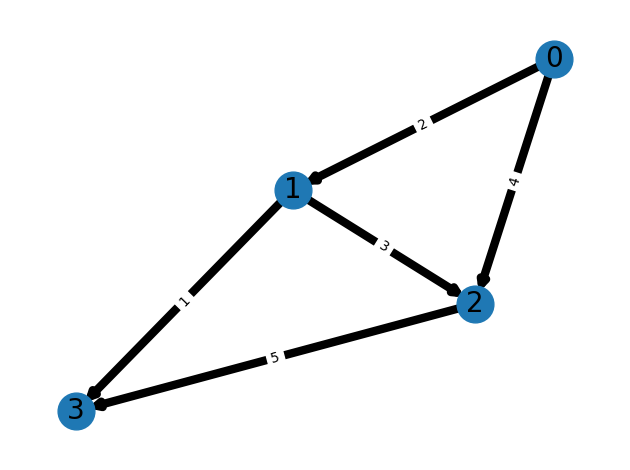

In [4]:
import matplotlib.pyplot as plt
import networkx as nx
import random

G = nx.DiGraph()

G.add_edge(0, 1, capacity=2)
G.add_edge(0, 2, capacity=4)
G.add_edge(1, 2, capacity=3)
G.add_edge(1, 3, capacity=1)
G.add_edge(2, 3, capacity=5)

pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=G.edges, width=6)

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")

# edge weight labels
edge_labels = nx.get_edge_attributes(G, "capacity")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

# Generazione grafo diretto con l'algoritmo Erdos-Renyi

In [5]:
def generate_file_from_graph(graph, filename):
    with open(filename, "w") as file:
        file.write(f"n {len(graph.nodes)}\n")
        for edge in graph.edges:
            file.write(f"e {edge[0]} {edge[1]} {graph.edges[edge]['capacity']}\n")

def draw_grap(G): 
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue')
    nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')
    edge_labels = nx.get_edge_attributes(G, 'capacity')
    nx.draw_networkx_edges(G, pos, arrows=True, connectionstyle='arc3, rad = 0.1')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, connectionstyle='arc3, rad = 0.1')
    plt.show()

def generate_random_graph(n, p, min_capacity, max_capacity):
    # G = nx.gnm_random_graph(n, m, directed=True, seed=7)
    G = nx.gnp_random_graph(n, p, directed=True, seed=7)
    for edge in G.edges:
        capacity = random.randint(min_capacity, max_capacity)
        G.edges[edge]['capacity'] = capacity
    return G

def compute_mincut(graph, source, sink):
    mincut_value, partition = nx.minimum_cut(graph, source, sink)
    reachable, non_reachable = partition
    print(f"Valore del taglio minimo: {mincut_value}")
    print("Partizione:", partition)
    print("Nodi raggiungibili dal nodo 0:", reachable)
    print("Nodi non raggiungibili dal nodo 0:", non_reachable)

In [6]:
n = 20000
p = 0.5
min_capacity = 1
max_capacity = 10
filename = "../input_data/graph6.txt"

newG = generate_random_graph(n, p, min_capacity, max_capacity)
# draw_grap(newG)
generate_file_from_graph(newG, filename)
compute_mincut(newG, 0, n-1)

KeyboardInterrupt: 